# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Gaurav Rana

# **Project Summary -**

We have been provided dataset of Rossman stores.For this project two files have been provides one is store file and another is rossman data file. Rossman data file have 1017209 rows and 9 columns and store file have 1115 rows and 10 columns.We have checked for null values and missing values and also replace null values with other values and drop some columns .
This project is of Regression type and for this project we have to predict the sales of rossman dataset.
In this dataset we have to analyse the data and we have to do Exploratory data analysis for the data 
in which through visualization we can get insights regarding our data.We have to explore data through charts like bar,pie,scatter and many more.

Analyse Regression analysis using following prediction analysis:

A. Linear Regression Analysis 

B. Lasso and Ridge Regression

C. Random Forest Regression

d. Xgboost

e. Decision tree

With the help of these algorithms we can find the accuracy of the models.

# **GitHub Link -**

https://github.com/ranagaurav23/regression-capstone-project

# **Problem Statement**



Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast 
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [3]:
# Load Dataset


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#loading dataset
#store_df=pd.read_csv('/content/drive/MyDrive/Copy of store.csv')
store_df=pd.read_csv('store (2).csv')

In [6]:
#loading dataset
#rossman_df=pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')
rossman_df=pd.read_csv('Rossmann Stores Data.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_10868\4032528524.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df=pd.read_csv('Rossmann Stores Data.csv')


### Dataset First View

In [7]:
# Dataset First Look
store_df

#from the store dataset we can tell that dataset have 1115 rows and 10 columns

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
store_df.head()
#head method return top n rows by default it returns 5 rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_df.tail()
#tail method returns last n rows by default it returns last 5 rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
#rossman dataset
rossman_df

#from rossman dataset we can tell that there are 1017209 rows and 9 columns

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
store_df.shape             #shape function used to find dimensions of dataset

(1115, 10)

In [12]:
rossman_df.shape

(1017209, 9)

### Dataset Information

In [13]:
# Dataset Info
store_df.info()               #info method gives the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
store_df.duplicated().sum()
# duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not
#in above operation sum will give the number of duplicate values

0

In [16]:
#rossman dataset
rossman_df.duplicated().sum()

0

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
store_df.isnull()

#isnull return True or False
#true if there is null value
#false if there is no null values

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,True,True,True
1112,False,False,False,False,True,True,False,True,True,True
1113,False,False,False,False,True,True,False,True,True,True


In [18]:
pd.isnull(store_df).sum().sort_values(ascending=False)
#sort values is used to order the data in ascending or descending order

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

in store dataset there are 6 columns with null values.
the columns:-

Promo2SinceWeek :-             544

Promo2SinceYear :-            544

PromoInterval   :-            544

CompetitionOpenSinceMonth :-   354

CompetitionOpenSinceYear :-    354

CompetitionDistance   :-         3

In [19]:
#Change data types object to int 
rossman_df.loc[rossman_df['StateHoliday'] == '0', 'StateHoliday'] = 0
rossman_df.loc[rossman_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
rossman_df.loc[rossman_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
rossman_df.loc[rossman_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
rossman_df['StateHoliday'] = rossman_df['StateHoliday'].astype(int, copy=False)

In [20]:

# change Data Types object into int 
store_df.loc[store_df['Assortment'] == 'a', 'Assortment'] = 0
store_df.loc[store_df['Assortment'] == 'b', 'Assortment'] = 1
store_df.loc[store_df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
store_df['Assortment'] = store_df['Assortment'].astype(int, copy=False)

In [21]:
# change Data Types object into int 
store_df.loc[store_df['StoreType'] == 'a', 'StoreType'] = 0
store_df.loc[store_df['StoreType'] == 'b', 'StoreType'] = 1
store_df.loc[store_df['StoreType'] == 'c', 'StoreType'] = 2
store_df.loc[store_df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
store_df['StoreType'] = store_df['StoreType'].astype(int, copy=False)

In [22]:

# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)


In [23]:

# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [24]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [25]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# **Store type distributions**

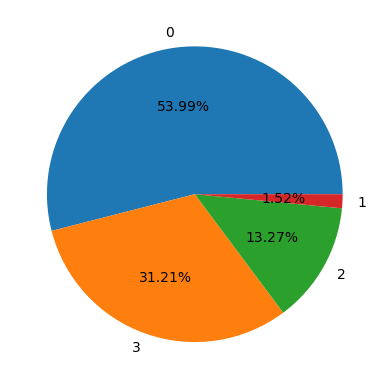

In [26]:
total=store_df['StoreType'].value_counts()
total
plt.pie(total,autopct='%.2f%%',labels=total.index)
plt.show()




In [27]:
#missing or null values
#rossman dataset

rossman_df.isnull()

#isnull return True or False
#true if there is null value
#false if there is no null values

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1017204,False,False,False,False,False,False,False,False,False
1017205,False,False,False,False,False,False,False,False,False
1017206,False,False,False,False,False,False,False,False,False
1017207,False,False,False,False,False,False,False,False,False


In [28]:
rossman_df.isnull().sum()

#there are no null values in rossman dataset

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### What did you know about your dataset?

We have been provided two datasets store and rossman dataset.
in store dataset there are 1115 rows and 10 columns and in rossman dataset we have 1017209 rows and 9 columns.

## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns
store_df.columns            #it will give a list of columns present in store dataset
#from here we can see that there are 10 columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [30]:
rossman_df.columns            #rossman dataset

#from above operation we can see that there are 9 columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [31]:
# Dataset Describe
store_df.describe()    #for store dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,1.217040,0.928251,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462
std,322.01708,1.369544,0.993814,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782
min,1.00000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,0.000000,0.000000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,0.000000,0.000000,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000
75%,836.50000,3.000000,2.000000,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,3.000000,2.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [32]:
rossman_df.describe()         #for rossman dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00


### Variables Description

**Id** - an Id that represents a (Store, Date) duple within the set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (Dependent Variable)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Merging datasets**

In [33]:
df=pd.merge(rossman_df,store_df,how='left',on='Store')               #merging dataset using left join where Store column is common
df.head()                            #to get data of top n rows


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0


In [34]:
df.tail()       #to get data of last n rows

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [35]:
df.shape       #after merging number of columns have increased

(1017209, 18)

In [36]:
df.info()                  #it gives information about the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int32  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int32  
 10  Assortment                 1017209 non-null  int32  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [37]:
for col in df.columns:
   print(f'Unique values for {col}: {df[col].unique()}')

Unique values for Store: [   1    2    3 ... 1113 1114 1115]
Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Date: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27

## 3. ***Data Wrangling***

### Data Wrangling Code

In [38]:
# Write your code to make your dataset analysis ready.
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)





In [39]:
#creating features from the date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()
df['Date']

C:\Users\HP\AppData\Local\Temp\ipykernel_10868\3476111681.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['Date'].dt.weekofyear


0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

we have replace character o with 0 in stateHoliday column.

replace null values from the columns Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0.

created year,month,week of year, day of year column using date column.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

StoreType
0    3165334859
1     159231395
2     783221426
3    1765392943
Name: Sales, dtype: int64

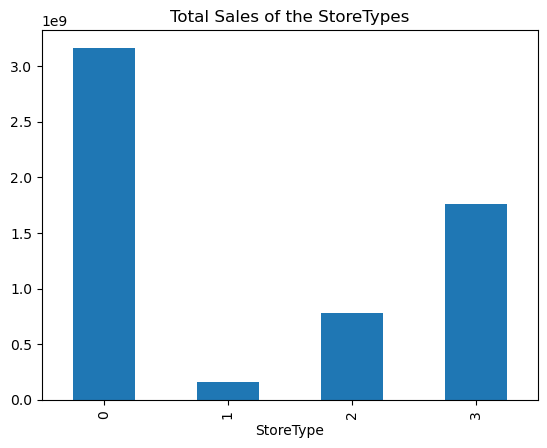

In [41]:
# Chart - 1 visualization code

df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", title = "Total Sales of the StoreTypes")
a=df.groupby("StoreType")["Sales"].sum()
a


##### 1. Why did you pick the specific chart?

Answer Here.to compare the sales of each store type.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-store type a has maximum sales.

#### Chart - 2

Text(0.5, 1.0, 'Store Open Countplot')

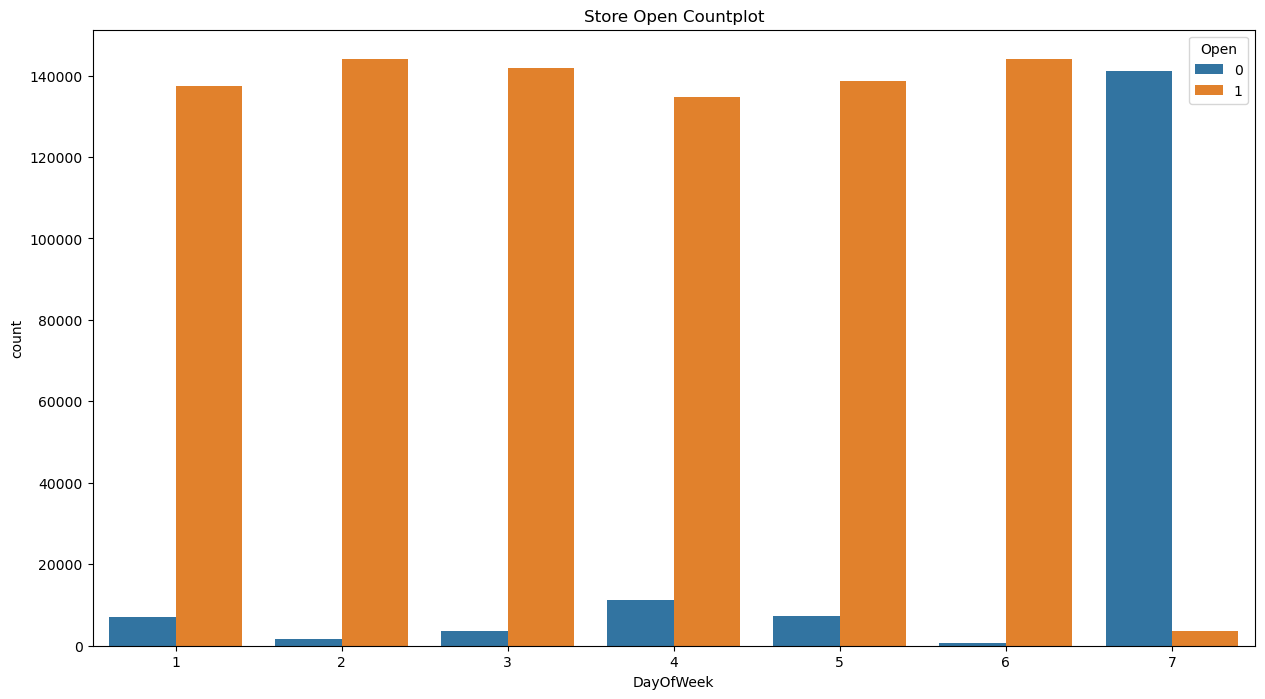

In [42]:
# Chart - 2 visualization code
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= df)
plt.title('Store Open Countplot')

##### 1. Why did you pick the specific chart?

Answer Here.to check store is open or not in days.

#### Chart - 3

Text(0.5, 1.0, 'Store Promo plot')

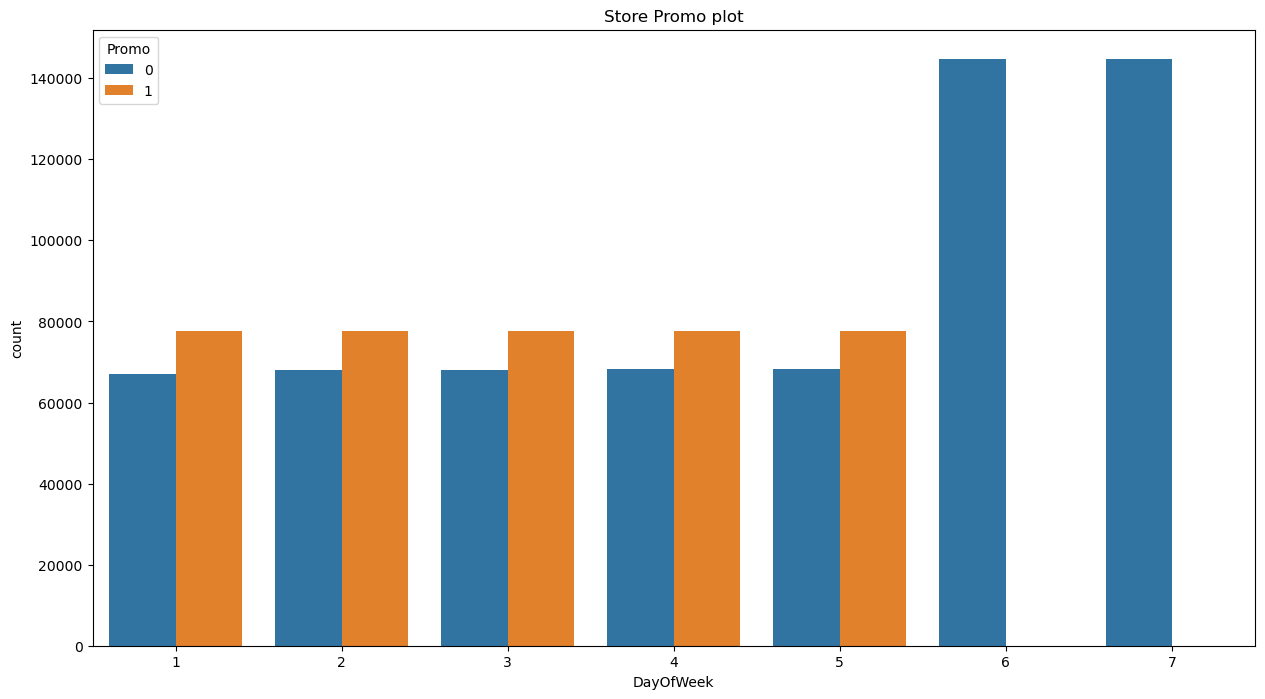

In [43]:
# Chart - 3 visualization code
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data=df)
plt.title('Store Promo plot')

#### Chart - 4

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

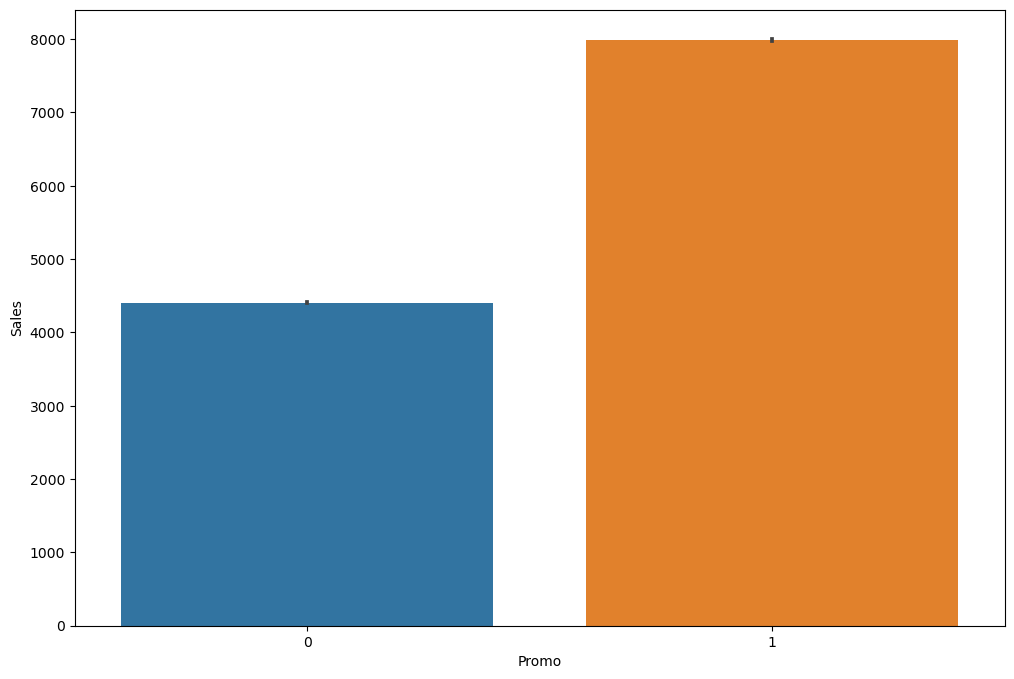

In [44]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 8))
sns.barplot(x="Promo", y="Sales", data=df)

##### 1. Why did you pick the specific chart?

Answer Here.Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

#### Chart - 5

Text(0.5, 1.0, ' Sales and Competition Open Since year')

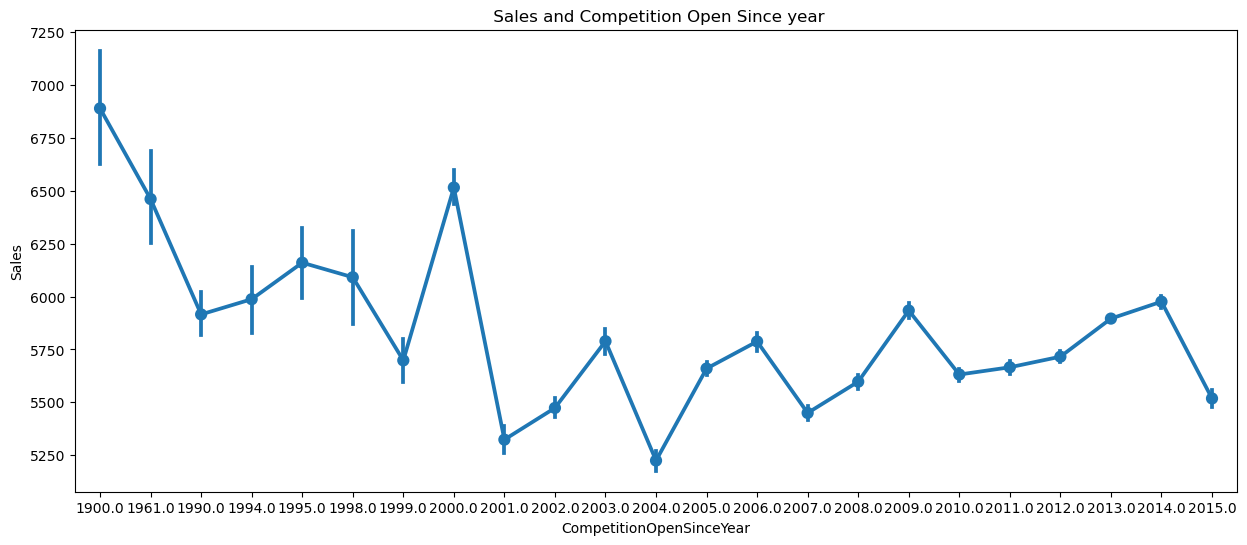

In [45]:
# Chart - 5 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)

plt.title(' Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

Answer Here.to check sales with respect to years.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:in 1900 sales is maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:In year 1900 the sales was maximum as there were less stores.

#### Chart - 6

Text(0.5, 1.0, 'Plot of Sales and Promo2SinceYear')

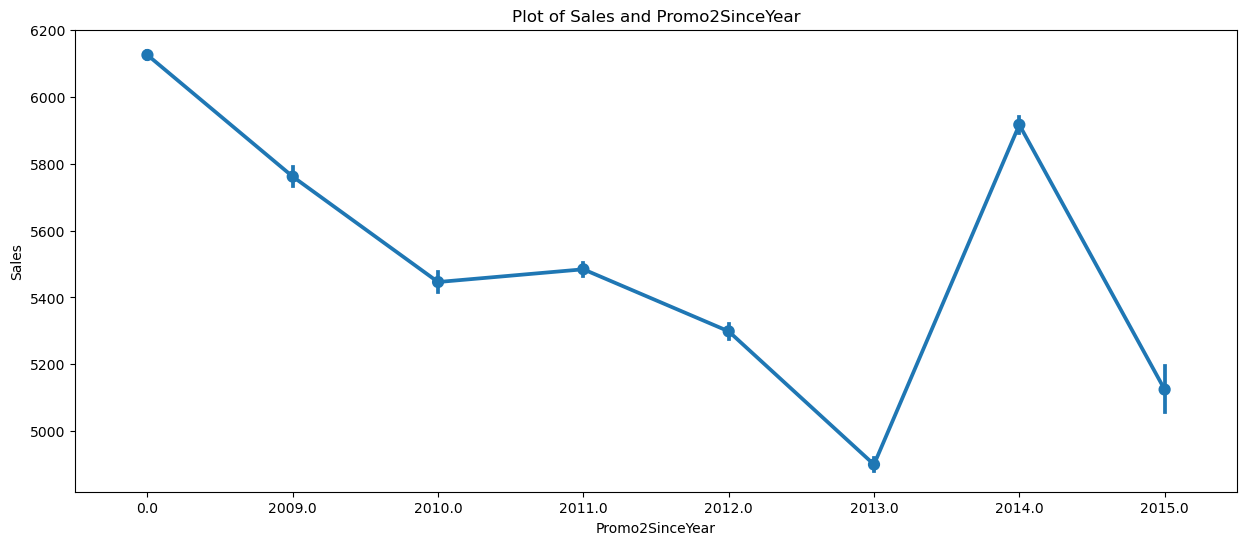

In [46]:
# Chart - 6 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df)

plt.title('Plot of Sales and Promo2SinceYear')


##### 1. Why did you pick the specific chart?

Answer Here.to check sales with respect to promotion in years.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:sales decreases in 2013 and 2015 even when promotion was done.

#### Chart - 7

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

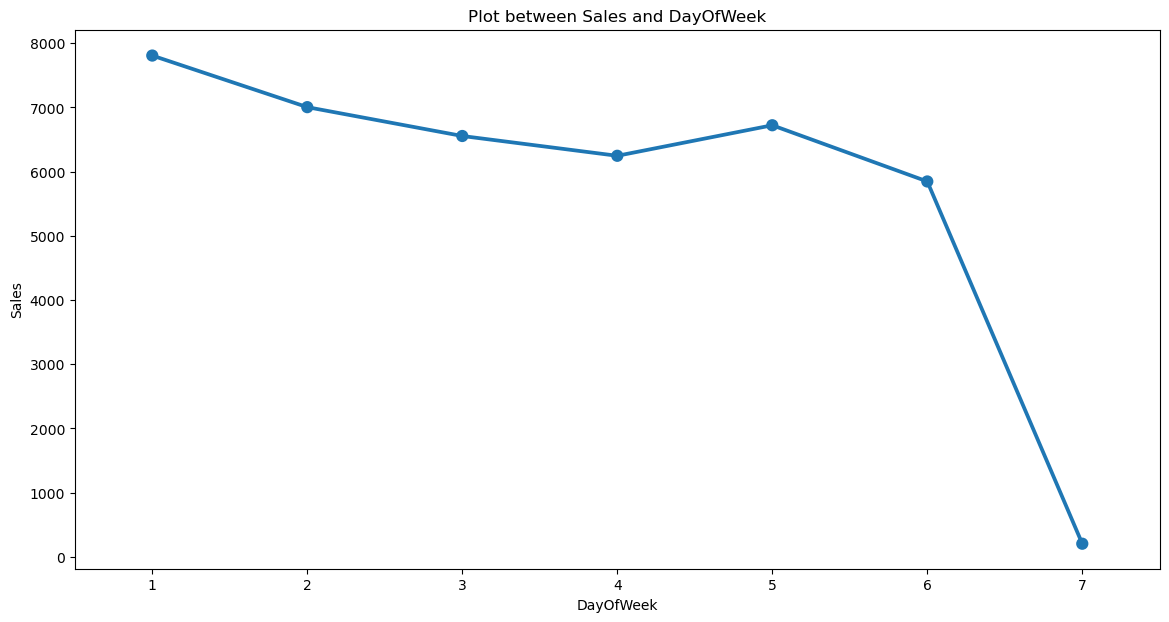

In [47]:
# Chart - 7 visualization code
plt.figure(figsize=(14,7))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=df)
plt.title('Plot between Sales and DayOfWeek')

from the chart we can clearly see that sales is minimum in 7th day that will be sunday .
and on sunday the stores must be closed thats why the sales are minimum.

#### Chart - 8

Text(0.5, 1.0, ' Sales and CompetitionOpenSinceMonth ')

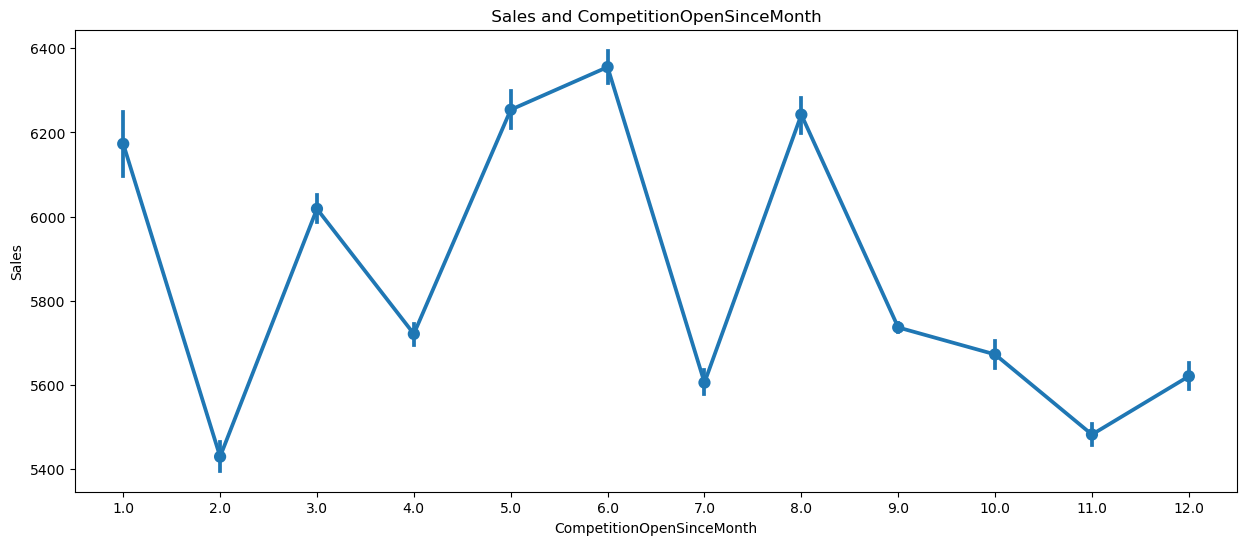

In [48]:
# Chart - 8 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=df)
plt.title(' Sales and CompetitionOpenSinceMonth ')

sales are fluctuating which indicates there is a huge competition .

#### Chart - 9

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

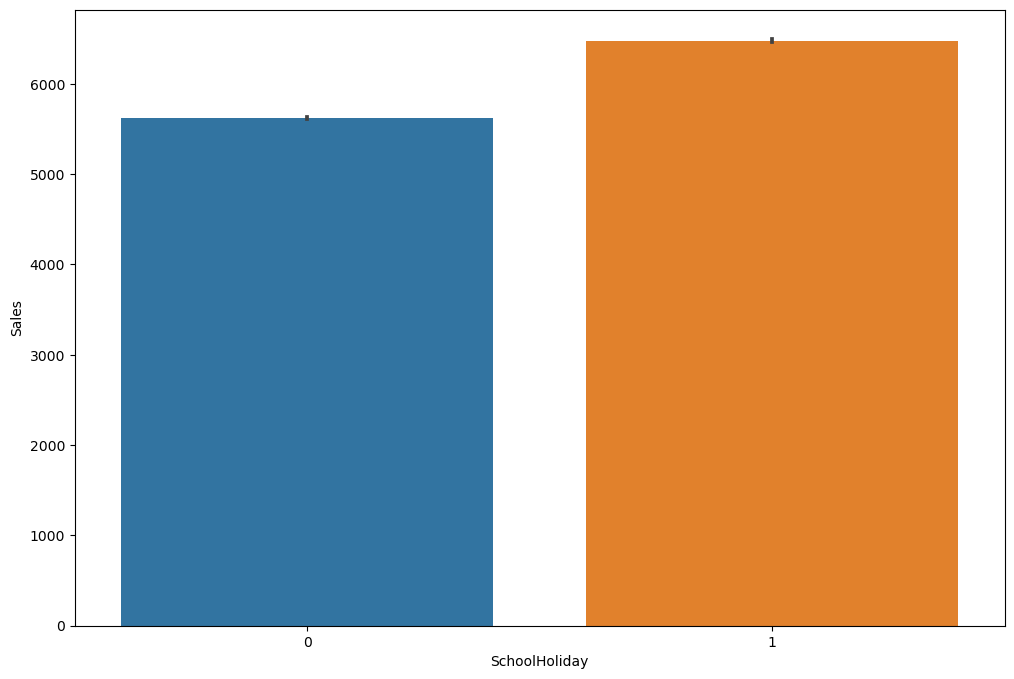

In [49]:
# Chart - 9 visualization code
plt.figure(figsize=(12, 8))
sns.barplot(x="SchoolHoliday", y="Sales", data=df)

orange bar represents holiday and it is interesting to see from the chart that the sales in holidays are more than the sales in no holiday days.

#### Chart - 10

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

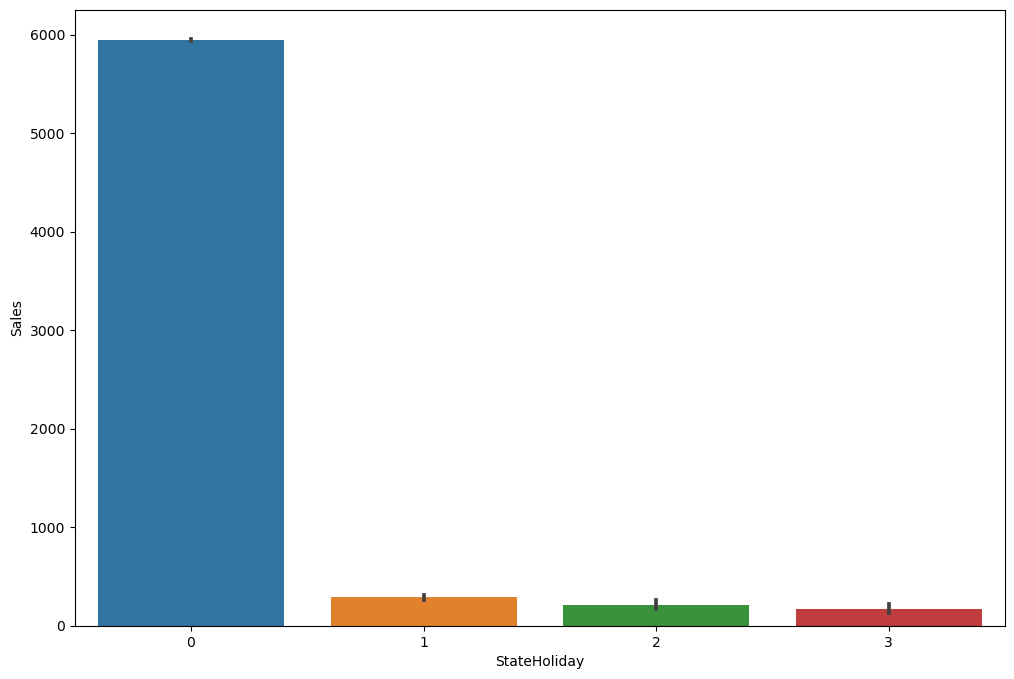

In [50]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 8))
sns.barplot(x="StateHoliday", y="Sales", data=df)   #using seaborn library

#0-public holiday
#1-easter
#2-christmas
#3-none

from the chart we can clearly see that sales were maximum in public holidays rather than religional holidays.

#### Chart - 11

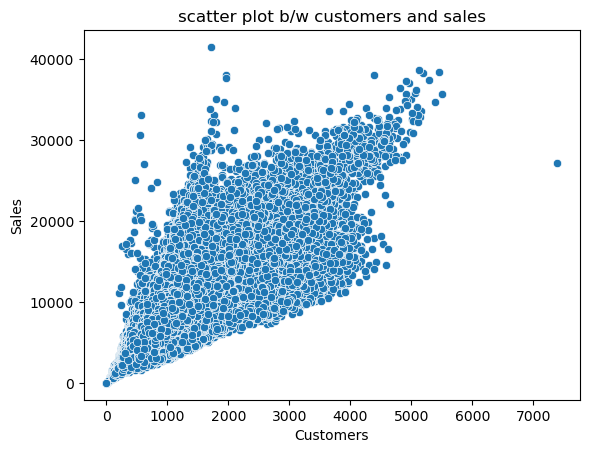

In [51]:
# Chart - 11 visualization code
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('scatter plot b/w customers and sales')
plt.show()


##### 1. Why did you pick the specific chart?

to show relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

from the chart the insights gained is that as the number of customers increases the sales also increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the gained insights can help creating a positive business impact as with the help of the insights we can easily tell where the stores can be set which will help to gain more revenue.

#### Chart - 12

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

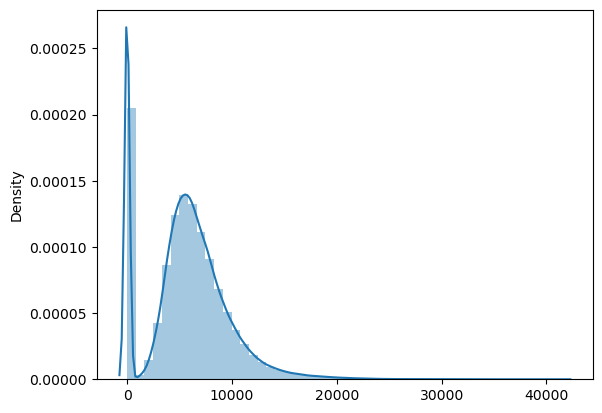

In [52]:
# Chart - 12 visualization code
sns.distplot(x=df['Sales'])

from the chart we can see that population density is not evenly distributed which shows that some region have high density and some have less density. 

#### Chart - 13

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

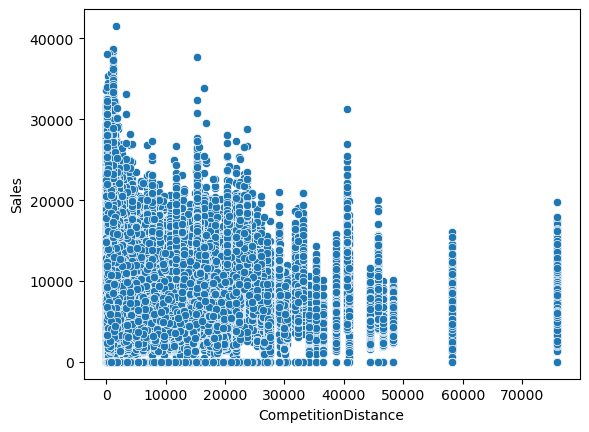

In [53]:
# Chart - 13 visualization code
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])

#scatterplot to check relationship

##### 1. Why did you pick the specific chart?

this chart is used to check relationship between two variables i.e competition distance and sales

##### 2. What is/are the insight(s) found from the chart?

from the chart we can clearly see that as the distance increases the sales start decreasing.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

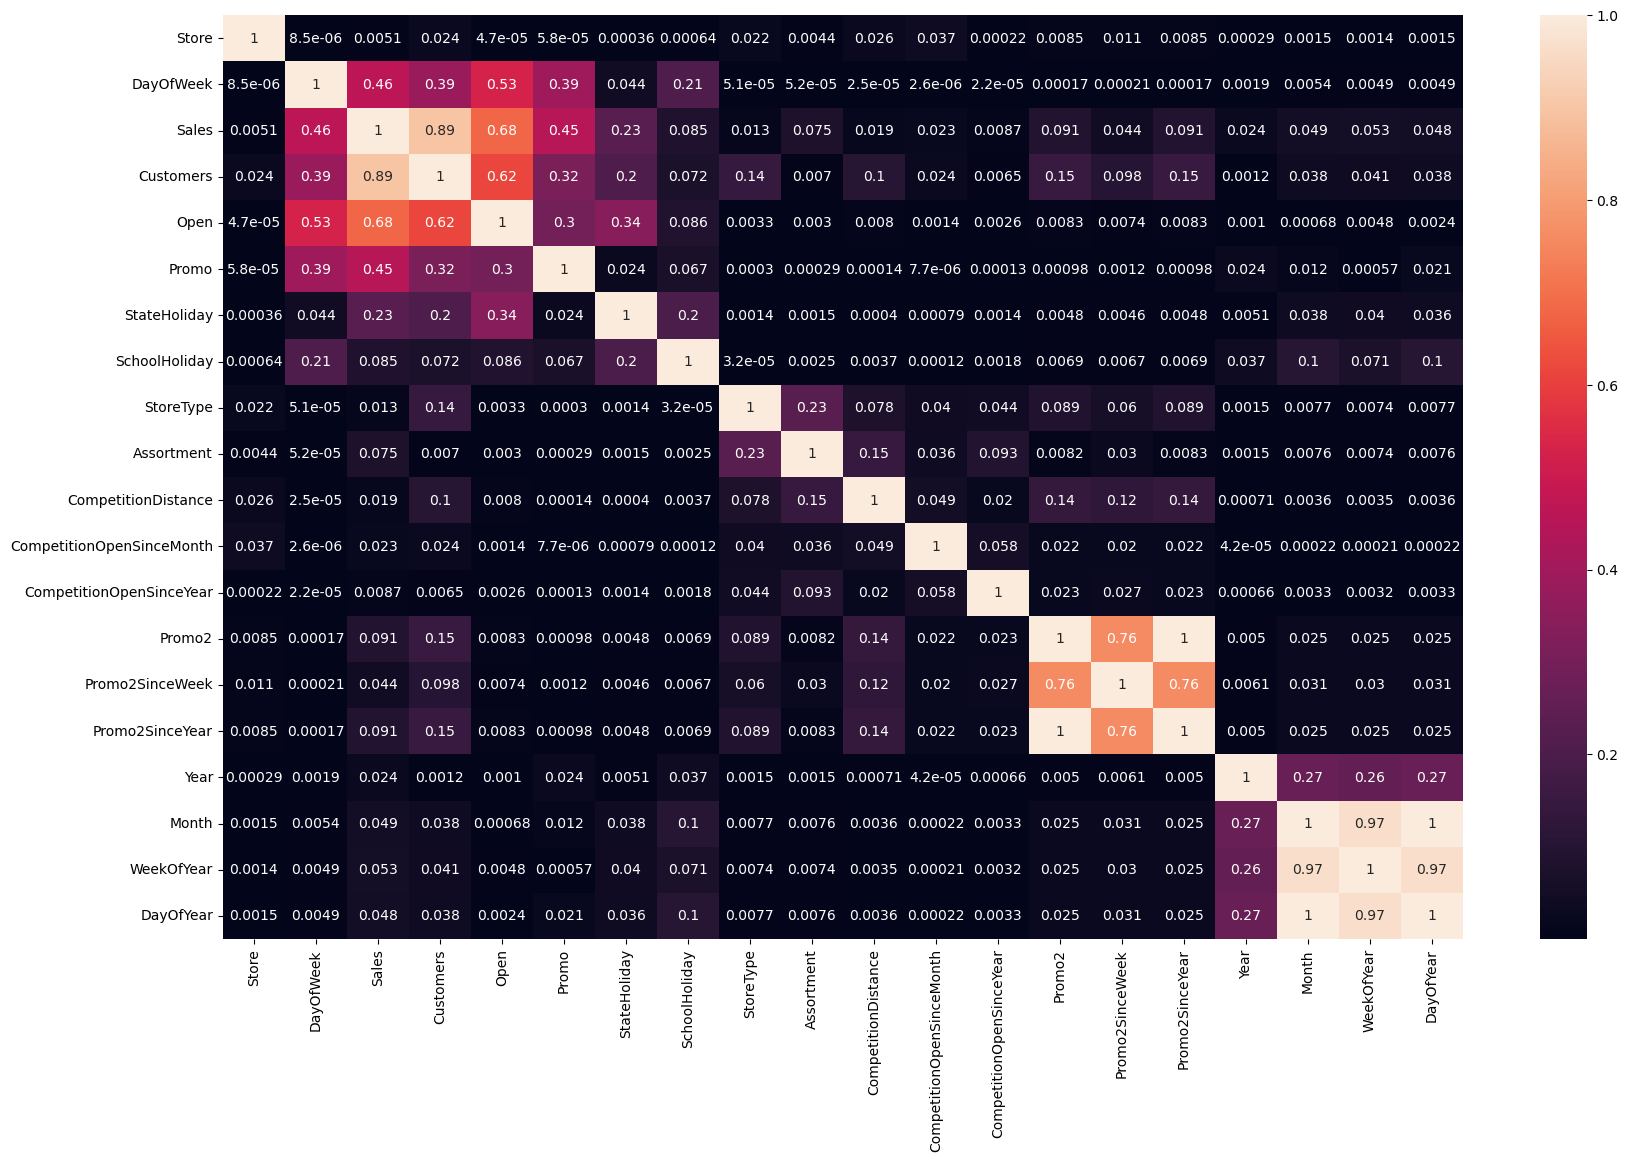

In [54]:
# Correlation Heatmap visualization code
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)

##### 1. Why did you pick the specific chart?

this chart represents magnitude of individual valueswithin a dataset as a colour.

in heatmap chart negatively corelated are determined by darker colours and positvely corelated are determined by lighter colours.

#### Chart - 15 - Pair Plot

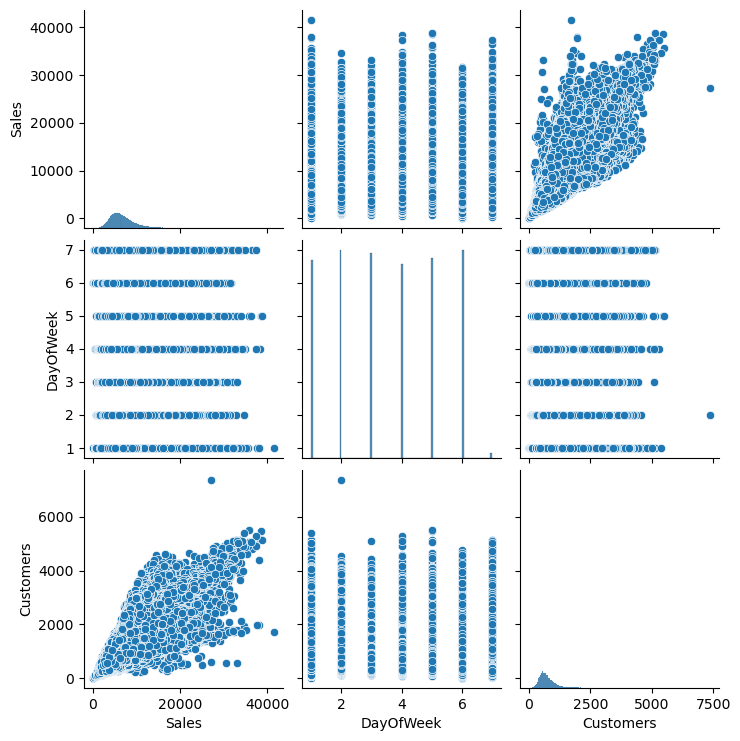

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1


In [55]:
# Pair Plot visualization code
corr=df[df['Sales']>0]   #sales must be greater than 0
sns.pairplot(corr[['Sales','DayOfWeek','Customers']])            #using seaborn library
plt.show()
corr

##### 1. Why did you pick the specific chart?

with the help of this chart we can find relations between many variables.

##### 2. What is/are the insight(s) found from the chart?

:-as customers increases sales also increases.

:-day of the week also play an important role in increase in sales,
  in weekends sales increases.


### Conclusion of EDA

1:Store type a has maximum sales.

2:Sales is directly dependent on the number of customers.

3:Sales are maximum in state holidays.

4:Plot b/w Promotion and Sales tells that promotion helps in sales.

5:From  Sales and day of week chart we can see that sales were very less on sunday.

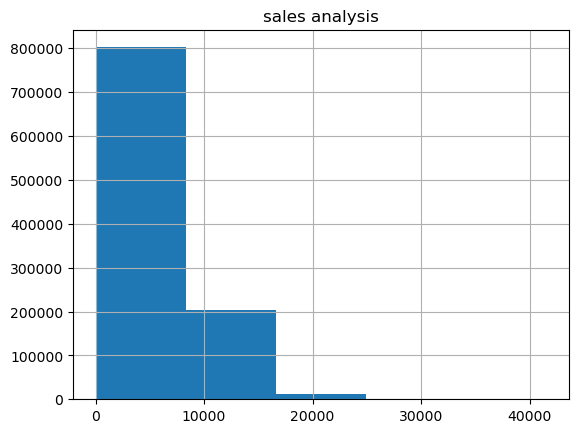

In [56]:
#sales analysis
pd.Series(df['Sales'],).hist(bins=5)
plt.title('sales analysis')
plt.show()

In [57]:
df[(df.Open == 0) & (df.Sales == 0)].count()[0]

#here open=0 means store are closed and sales=0 means no sales 
#so we will drop these from dataset to train our model without any error

172817

In [58]:
df1=df.drop(df[(df.Open == 0) & (df.Sales == 0)].index)
df1.shape

(844392, 22)

In [59]:
df1 = pd.get_dummies(df1, columns=['PromoInterval']) #to get binary values i.e 0 and 1

In [60]:
df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,Year,Month,WeekOfYear,DayOfYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,0.0,0.0,2015,7,31,212,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,13.0,2010.0,2015,7,31,212,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14.0,2011.0,2015,7,31,212,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,0.0,0.0,2015,7,31,212,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,0.0,0.0,2015,7,31,212,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,0.0,0.0,2013,1,1,1,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,0.0,0.0,2013,1,1,1,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,48.0,2012.0,2013,1,1,1,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,0.0,0.0,2013,1,1,1,1,0,0,0


In [61]:
df1.to_csv('cleandata.csv', index=False)

## ***Hypothesis Testing***

### Hypothetical Statement - 1

Model 1 will have the dataset but not including the rows where sales is equal to 0.

### Hypothetical Statement - 2

in model 2 we will deal with the whole dataset

## *** ML Model Implementation***

### ML Model - 1 excuding rows where sales is equal to 0

In [62]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [63]:
# ML Model - 1 Implementation

from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
# defining dependent variable
dependent= 'Sales'

# defining independent variable
independent= list(df1.columns.drop(['Promo2SinceYear','Date','Sales']))

In [65]:
independent

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Year',
 'Month',
 'WeekOfYear',
 'DayOfYear',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [66]:
# Create the data of independent variables
X= df1[independent].values

# Create the data of dependent variable
y =df1[dependent].values
X


array([[1.000e+00, 5.000e+00, 5.550e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 5.000e+00, 6.250e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 5.000e+00, 8.210e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.690e+02, 2.000e+00, 1.248e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [9.480e+02, 2.000e+00, 1.039e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.097e+03, 2.000e+00, 1.405e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [67]:
y

array([5263, 6064, 8314, ..., 5035, 4491, 5961], dtype=int64)

In [68]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(675513, 22)
(168879, 22)


In [69]:
# Here we Train the model 

X_train


array([[2.640e+02, 4.000e+00, 7.270e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.500e+01, 3.000e+00, 5.620e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.052e+03, 5.000e+00, 8.630e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [9.250e+02, 3.000e+00, 1.044e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.050e+02, 1.000e+00, 7.690e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.720e+02, 3.000e+00, 5.000e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [70]:
X_test

array([[231.,   6., 460., ...,   1.,   0.,   0.],
       [ 56.,   2., 430., ...,   0.,   0.,   1.],
       [229.,   4., 696., ...,   0.,   1.,   0.],
       ...,
       [881.,   2., 478., ...,   1.,   0.,   0.],
       [960.,   1., 704., ...,   1.,   0.,   0.],
       [830.,   3., 622., ...,   0.,   1.,   0.]])

In [71]:
#Checking the Regression Score i.e R-squared value
reg = LinearRegression().fit(X_train, y_train)

In [72]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)
     

0.7648687126248672

In [73]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.66366000e-01, -6.86811989e+01,  6.34607025e+00, -4.72510919e-13,
        1.29511903e+03, -1.28800141e+03,  3.49609859e+01,  2.75914582e+02,
        2.15185232e+02,  2.86624737e-02, -1.09587171e+01, -3.06663212e+00,
       -4.41000139e+01,  1.19613654e+01,  1.77566952e+02,  1.32582363e+01,
       -2.06249812e+00,  1.19900889e+00,  4.41000139e+01,  3.09535708e+01,
        1.42485764e+02, -2.17539348e+02])

In [74]:
# Checking the intercept of different indpendent columns
reg.intercept_
     

-350548.50572742155

In [75]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([5414.91360952, 4642.43109281, 7440.22210411, ..., 4283.01560114,
       7831.92033407, 5531.43761752])

In [76]:
# Original Test Dependent Value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828], dtype=int64)

In [77]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

array([5554.02988639, 6644.92959497, 6770.14017793, ..., 8115.98821499,
       6984.97003213, 6160.16735173])

In [78]:
# Dependent Variable With Train Dataset i.e 80 %
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862], dtype=int64)

In [79]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2252681.1149258935
RMSE : 1500.89343889761


In [80]:
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7648196233457603


In [81]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'predicted'])

,actual,predicted
0,5495,5414.913610
1,5472,4642.431093
2,7969,7440.222104
3,7384,6050.325896
4,13212,7773.552824
...,...,...
168874,16337,16138.677668
168875,9195,6967.613689
168876,2938,4283.015601
168877,10413,7831.920334


In [82]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


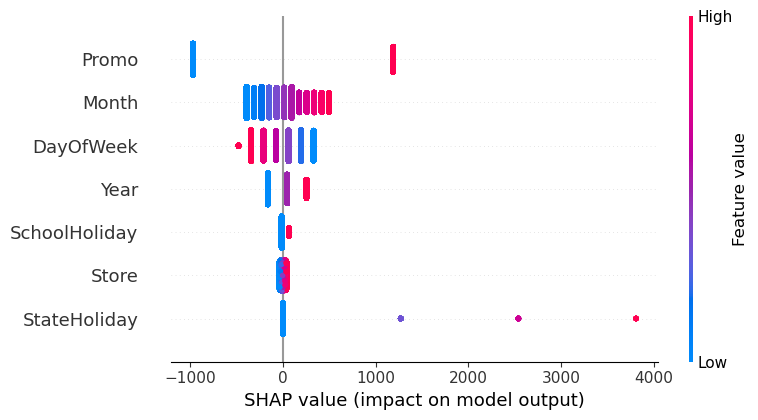

[('2013.00 < Year <= 2014.00', 269595.5658968662), ('StateHoliday <= 0.00', 45976.50695593215), ('DayOfWeek > 4.00', 5028.598287433202), ('Promo <= 0.00', 4500.791152134801)]


X does not have valid feature names, but LinearRegression was fitted with feature names


In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

# load the Rossman dataset
data =pd.read_csv('cleandata.csv', low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# selecting features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']



# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

#  linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())


### Lasso

LASSO stands for least absolute shrinkage and selection operator.
It is used to estimate relationships b/w variables and make predictions.
It can handle highly corelated features better than standard linear regression.

In [85]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [86]:
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [87]:
y_pred_lasso = L1.predict(X_test)

In [88]:
L1.score(X_test, y_test)

0.14929180103281814

In [89]:
cv_score = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_score.mean()

In [90]:
mean_cv_score

0.7595829987588412

In [91]:
cv_score

array([0.73851091, 0.75580788, 0.76376104, 0.75148719, 0.75811907,
       0.76394896, 0.76137312, 0.75972631, 0.76273516, 0.78036036])

In [92]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#  range of alpha values 
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

#  grid search to find  best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [93]:
#  best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [94]:
best_alpha_lasso         #getting value

0.2

In [95]:
best_score_lasso

0.7621909328186826

In [96]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'predicted'])

,actual,predicted
0,5203,5829.289727
1,8590,7794.671860
2,6465,6414.968598
3,7250,6251.958715
4,4339,6015.521967
...,...,...
168874,10096,8312.337646
168875,12400,7972.321137
168876,7499,5301.836078
168877,11606,7865.971445


# Ridge 

Also known as L2 regularization and is a statistical regularization technique,
It corrects for overfitting on training data in ML models.

In [97]:
L2 = Ridge(alpha = 0.5)

In [98]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [99]:
L2.predict(X_test)

array([5828.34673874, 7794.37526191, 6414.09982314, ..., 5300.58425416,
       7866.48628639, 5957.11172635])

In [100]:
L2.score(X_test, y_test)

0.14931114547969015

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
bestalpha = ridge_cv.best_params_['alpha']
bestscore = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=bestalpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
maxscore = cv_scores.max()
maxalpha = bestalpha

print("Best alpha: ", bestalpha)
print("Best score: ", bestscore)
print("Maximum score: ", maxscore)
print("alpha value: ", maxalpha)


Best alpha:  0.5
Best score:  0.7621880759689998
Maximum score:  0.7710078927916971
alpha value:  0.5


# Decision Tree

It is a supervised learning algorithm used for both regression and classification tasks.


In [102]:
salesmean=df[dependent].mean()

In [103]:
salesmean

5773.818972305593

In [104]:
new_mean=df1[dependent].mean()

In [105]:
new_mean

6955.514290755952

In [106]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

MSE  = mean_squared_error(y_test, y_pred_dt)  #calculating mean squared error
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)                           #calculating root mean squared error
print("RMSE :" ,RMSE)

RMPSE=RMSE/new_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)              #calculating r2
print("R2 :" ,r2)

MSE : 7530720.762298567
RMSE : 2744.2158738515027
RMPSE : 0.39453816916150003
R2 : 0.21910969666765134


### ML Model - 2(whole dataset)

in dataset df the column promointerval will have 0 and 1 values

In [107]:
df = pd.get_dummies(df, columns=['PromoInterval'])

In [108]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,Year,Month,WeekOfYear,DayOfYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,0.0,0.0,2015,7,31,212,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,13.0,2010.0,2015,7,31,212,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14.0,2011.0,2015,7,31,212,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,0.0,0.0,2015,7,31,212,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,0.0,0.0,2015,7,31,212,1,0,0,0


In [109]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,Year,Month,WeekOfYear,DayOfYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,31.0,2013.0,2013,1,1,1,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,0.0,0.0,2013,1,1,1,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,0.0,0.0,2013,1,1,1,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,0.0,0.0,2013,1,1,1,1,0,0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,3,...,22.0,2012.0,2013,1,1,1,0,0,0,1


In [110]:
# defining dependent variable
dependent_var = 'Sales'

# defining independent variable
independent_var = df.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [111]:
independent_var                   #getting values of independent variables

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Year', 'Month', 'WeekOfYear', 'DayOfYear',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [112]:
# Create the data of independent variables
a = df[independent_var].values
# Create the dependent variable data
b = df[dependent_var].values

In [113]:
# splitting the dataset
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state = 0)
print(a_train.shape)


(813767, 21)


# Linear Regression

In [114]:
# scaling the x values
scaler=StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [115]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(a_train, b_train)

LinearRegression()

In [116]:
b_predicted=linear_regression.predict(a_test)
b_predicted

array([ 7006.77658135, 12479.21408135,  9340.77658135, ...,
        6837.90158135,  5795.83908135,  4122.65158135])

In [117]:
linear_regression.score(a_train, b_train)

0.8683920573957475

In [118]:
regression_Dataframe = pd.DataFrame(zip(b_test, b_predicted), columns = ['actual', 'predicted'])
regression_Dataframe

,actual,predicted
0,7285,7006.776581
1,6221,12479.214081
2,8132,9340.776581
3,20916,11614.089081
4,5472,6599.214081
...,...,...
203437,5650,6816.714081
203438,5464,6516.589081
203439,6191,6837.901581
203440,5663,5795.839081


In [119]:
from sklearn.metrics import mean_squared_error       #importing metrics

MSE  = mean_squared_error(b_test, b_predicted)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/salesmean
print("RMPSE :",RMPSE)

r2 = r2_score(b_test, b_predicted)
print("R2 :" ,r2)

MSE : 1935136.493871651
RMSE : 1391.0918351682074
RMPSE : 0.2409309751207386
R2 : 0.8690416855332207


## Xgboost

XGBoost is a boosting algorithm that uses bagging, which trains multiple decision trees and then combines the results.

In [120]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(a_train, b_train)
b_pred_xgb = xgboost.predict(a_test)

MSE = mean_squared_error(b_test, b_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/salesmean
print("RMPSE :", RMPSE)

r2 = r2_score(b_test, b_pred_xgb)
print("R2 :", r2)


MSE : 138622.0881643521
RMSE : 372.3198734480233
RMPSE : 0.06448416121701667
R2 : 0.9906188968729805


## Random forest

Random forest regression is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression in machine learning. 

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

random_forest.fit(a_train, b_train)     # Fit random forest to the training data

b_pred_rf = random_forest.predict(a_test) # Make predictions on the test data

# Calculate  mean squared error 
MSE = mean_squared_error(b_test, b_pred_rf)
print("MSE:", MSE)

RMSE = np.sqrt(MSE)                 # Calculate root mean squared error 
print("RMSE:", RMSE)

sales_mean = np.mean(b_test)      # Calculate  root mean squared percentage error
RMPSE = RMSE / salesmean
print("RMPSE:", RMPSE)

r2 = r2_score(b_test, b_pred_rf)    # Calculate R2 score
print("R2:", r2)


MSE: 1113563.3757249287
RMSE: 1055.2551235246046
RMPSE: 0.1827655367420052
R2: 0.9246407769174416


## Decision tree

In [122]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(a_train, b_train)
b_pred_dt = decision_tree.predict(a_test)
b_train_dt = decision_tree.predict(a_train)

MSE  = mean_squared_error(b_test, b_pred_dt)
print("MSE :" , MSE)


RMPSE=RMSE/salesmean
print("RMPSE :",RMPSE)


RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(b_test, b_pred_dt)
print("R2 :" ,r2)

MSE : 1938401.7013646904
RMPSE : 0.1827655367420052
RMSE : 1392.2649537227785
R2 : 0.8688207160713626


# **Conclusion**

Our Sales column contains 172817 rows with 0 sale. So a dataframe is made in which we removed 0 sales rows and then train our model. We used various algorithms and got accuracy score around 73% to 75%.
We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about 99% from xgboost which is far better than previous model.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***